In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

##### Loading the dataset

In [2]:
df = pd.read_csv(r"D:\ICTAK\Assignments\Assignment 04\titanic_dataset.csv", index_col = 'PassengerId')

##### Getting the head of the datast

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Getting the shape of the dataset

In [4]:
df.shape

(891, 11)

##### Getting the info of the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


##### Getting the statistical summary of the dataset

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Getting the datatype of each column in the dataset

In [7]:
df.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

##### Finding the sum of missing values in each column of the dataset

In [8]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### <font color = green> There are missing values in three columns.

##### Getting the distribution of 'Age' column

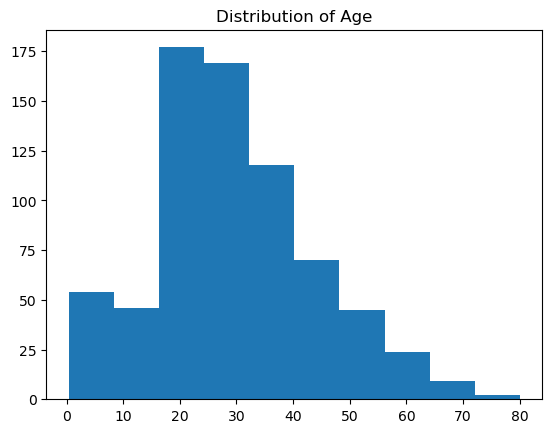

In [9]:
plt.hist(df['Age'])
plt.title('Distribution of Age')
plt.show()

#### <font color = green> The column 'Age' is close to normally distributed. So we can fill the missing values in the 'Age' column by its mean.

##### Filling the missing value in the 'Age' column.

In [10]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

##### Getting the value counts of the column 'Embarked'.

In [11]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

##### Filling the missing value in the 'Embarked' column.

In [12]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace = True)

##### Getting the percentage of missing values in the column 'Cabin'.

In [13]:
print('There are', np.round(df['Cabin'].isna().mean()*100,2), '% missing values in the column Cabin')

There are 77.1 % missing values in the column Cabin


#### <font color = green> Since the missing values in the column 'Cabin' is more than three-fourth of the number of observation, we can drop this column.

##### Dropping the column 'Cabin'

In [14]:
df.drop('Cabin', axis = 1, inplace = True)

##### Dropping irrevelant columns

In [15]:
df.drop(['Name', 'Ticket'], axis = 1, inplace = True)

In [16]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


##### Finding whether there is null values in the dataset

In [17]:
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

##### Finding outliers in the numerical columns using boxplot graph

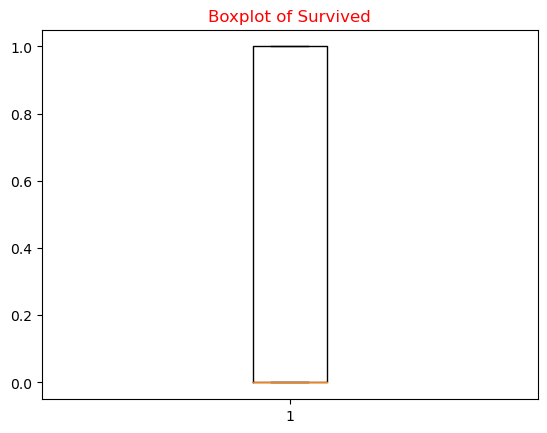

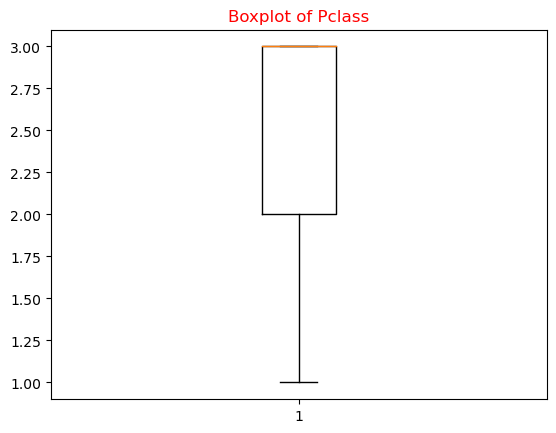

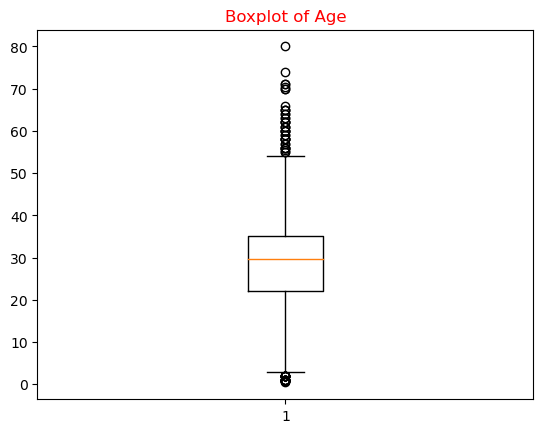

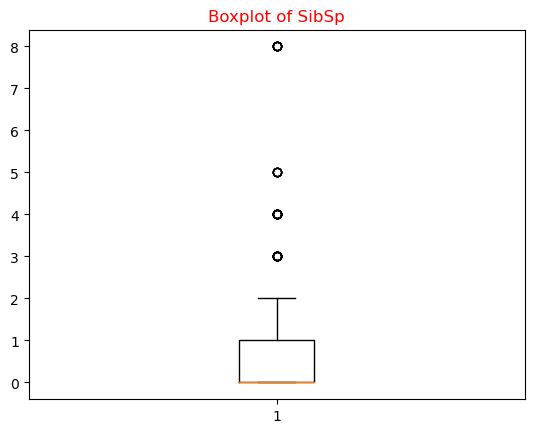

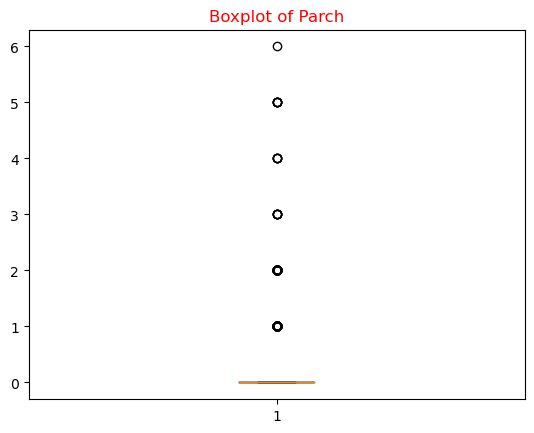

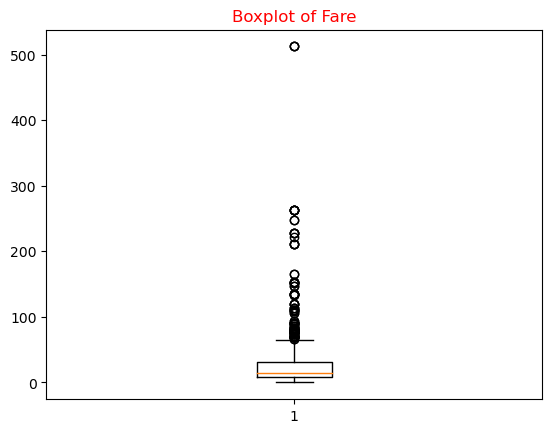

In [18]:
num_col = df.select_dtypes(include=['float', 'int'])
for col in num_col:
    plt.figure()
    plt.boxplot(df[col])
    plt.title('Boxplot of {}'.format(col), color = 'r')
    plt.show()

#### <font color = green> There are 4 columns with outliers in the dataset

##### Dropping outliers from the column 'SipSb'

In [19]:
Q1 = df['SibSp'].quantile(0.25)
Q3 = df['SibSp'].quantile(0.75)
IQR = Q3 - Q1
low = Q1 - (1.5 * IQR)
upp = Q3 + (1.5 * IQR)
out_ind = df[(df['SibSp'] > upp) | (df['Fare'] < low)].index
df.drop(out_ind, inplace = True)

In [20]:
df.shape

(845, 8)

##### Flooring and Capping the outliers in the columns 'Age' and 'Fare'

In [21]:
for col in ['Age', 'Fare']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - (1.5 * IQR)
    upp = Q3 + (1.5 * IQR)
    df[col] = np.where(df[col] > upp, upp, np.where(df[col] < low, low, df[col]))

## <font color = brown> One Hot Encoding

##### Finding how many unique value in the column 'Sex'

In [22]:
df.Sex.nunique()

2

##### Finding how many unique value in the column 'Embarked'

In [23]:
df.Embarked.nunique()

3

##### One hot encode the data

In [24]:
df1 = pd.get_dummies(df)

In [25]:
df1.shape

(845, 11)

In [26]:
df1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,1,38.0,1,0,63.1563,1,0,1,0,0
3,1,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,1,35.0,1,0,53.1000,1,0,0,0,1
5,0,3,35.0,0,0,8.0500,0,1,0,0,1


## <font color = brown> Min Max Scaling

In [27]:
x = df.drop('Survived', axis = 1)  # DataFrame with feature columns
y = df['Survived']                 # Target column

#### <font color = violet> We should drop the categorical columns before scaling

In [28]:
x.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

##### Dropping the categorical columns

In [29]:
x1 = x.drop(['Sex', 'Embarked'], axis = 1)

In [30]:
x1.head()

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,63.1563
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500


In [31]:
x1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,845.000000,845.000000,845.000000,845.000000,845.000000
mean,2.279290,30.245625,0.313609,0.317160,22.936517
std,0.840396,11.653890,0.530909,0.765829,19.735094
min,1.000000,3.500000,0.000000,0.000000,0.000000
25%,1.000000,23.000000,0.000000,0.000000,7.895800
50%,3.000000,29.699118,0.000000,0.000000,13.000000
75%,3.000000,36.000000,1.000000,0.000000,30.000000
max,3.000000,55.500000,2.000000,6.000000,63.156300


##### Importing MinMaxScaler

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
min_max = MinMaxScaler()

##### Scaling the dataset

In [34]:
x1 = min_max.fit_transform(x1)

#### <font color = green> The variable will be converted into a numpy array after scaling. So we need to convert it into dataframe.

In [35]:
x.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

##### Converting the numpy array into a DataFrame

In [36]:
x1 = pd.DataFrame(x1, columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])

In [37]:
x1.describe()

,Pclass,Age,SibSp,Parch,Fare
count,845.000000,845.000000,845.000000,845.000000,845.000000
mean,0.639645,0.514339,0.156805,0.052860,0.363171
std,0.420198,0.224113,0.265454,0.127638,0.312480
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.375000,0.000000,0.000000,0.125020
50%,1.000000,0.503829,0.000000,0.000000,0.205839
75%,1.000000,0.625000,0.500000,0.000000,0.475012
max,1.000000,1.000000,1.000000,1.000000,1.000000
